<a href="https://colab.research.google.com/github/hallemaynard12/Client-Presentations-Spring-2024/blob/main/Client_Presentation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## $\color{red}{\text{Presentation 3:}}$

### $\color{green}{\text{Part 1: Data Cleaning}}$

**Import Required Packages, Data, and Mount Drive:**

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Python Data'
churn_df = pd.read_excel('churn.xlsx', sheet_name = "BankChurners")

/content/drive/MyDrive/Python Data


## $\color{red}{\text{Data Transformation}}$

### $\color{blue}{\text{Missing Value Analysis}}$

- Checking missing values in the data

Separate numeric and categorical components

In [ ]:
# Numeric component of HR dataset
churn_df_num = churn_df.select_dtypes(include = np.number) # Selecting only the numeric data of the dataset // select data types and including only numbers
# churn_df_num.head()

# Categorical component of HR dataset
churn_df_cat = churn_df.select_dtypes(exclude = np.number) # Selecting only the categorical data // select data types and exluding numeric
churn_df_cat.head()

Client_Attrition Gender Education_Level Marital_Status Income_Category  \
0               NO      M             NaN        Married          $120K+   
1               NO      M      Uneducated            NaN          $120K+   
2               NO      M             NaN        Married          $120K+   
3              YES      M        Graduate        Married          $120K+   
4               NO      M   Post-Graduate         Single          $120K+   

  Card_Category  
0          Gold  
1          Blue  
2          Blue  
3          Blue  
4          Blue

In [ ]:
# Function to compute missing values
def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

# Using the function
percent_missing(churn_df).head()

Total_Revolving_Bal    0.243902
Education_Level        0.149995
Income_Category        0.109805
Marital_Status         0.073961
Credit_Limit           0.003456
dtype: float64

### $\color{blue}{\text{Imputation}}$

In [ ]:
# Function to do conditional deletion

def semi_listwise(data, nan_percent):
    d1 = data.isnull().sum().divide(len(data)).sort_values(ascending=False)
    culprit_vars = []
    for i in range(len(d1.values)):
        if(d1.values[i] >= nan_percent):
            culprit_vars.append(d1.index[i])
    return data[data.columns.difference(culprit_vars)]

In [ ]:
delCol15_num = semi_listwise(churn_df_num, 0.15) # Deleting all columns with 15% missing data
delCol15_cat= semi_listwise(churn_df_cat, 0.15) # deleting columns  with 15% missing categorical
# Check if deletion worked
print(churn_df.shape) # Printing shape of original data
print(delCol15_num.shape) # Printing shape of deleted columns
print(delCol15_cat.shape) # printed shape of categorical columns

(10127, 21)
(10127, 14)
(10127, 6)


In [ ]:
# Find the median
col_med = delCol15_num.median() # calculating the median for each column
# print(col_med) # Printing the medians for each column

# Now inpute missing data with the median
churn_df_num = delCol15_num.fillna(col_med) # Filling in missing data with the median for each column

# Now check if data is missing
percent_missing(churn_df_num)

Age                      0.0
Avg_Open_To_Buy          0.0
Avg_Utilization_Ratio    0.0
Client_ID                0.0
Contacts_In12Mon         0.0
Credit_Limit             0.0
Dependent_Count          0.0
Inactive_In12Mon         0.0
Months_With_Bank         0.0
Products_By_Clients      0.0
Total_Amt_Chng_Q4_Q1     0.0
Total_Ct_Chng_Q4_Q1      0.0
Total_Trans_Amt          0.0
Total_Trans_Ct           0.0
dtype: float64

In [ ]:
# Find the mode for each column
col_mode = delCol15_cat.mode().iloc[0]  # Calculate the mode for each column
#used iloc to access mode values directly
# Impute missing data with the mode
churn_df_cat = delCol15_cat.fillna(col_mode)  # Fill in missing data with the mode for each column

# Now check if data is missing
percent_missing(churn_df_cat)


Client_Attrition    0.0
Gender              0.0
Education_Level     0.0
Marital_Status      0.0
Income_Category     0.0
Card_Category       0.0
dtype: float64

### $\color{blue}{\text{Multicollinearity}}$

**Multicollinearity** occurs when variables have similar information
- Variables with a correlation greater than 0.70 are considered to have similar information

In [ ]:
#!pip install dython
from dython.nominal import associations
import seaborn as sns

def corrPlot(data):

  # Use "associations" function to compute correlation between all variables
  corr_matrix = associations(dataset=data, compute_only=True)['corr']

  # Mask the upper triangle of correlation heatmap
  mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

  # Plotting correlation heatmap
  plt.figure(figsize=(12, 8))
  sns.heatmap(corr_matrix, annot=True, mask=mask_upper, cmap='coolwarm_r', fmt='.2f', vmin=-1, vmax=1)
  plt.show()

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]]

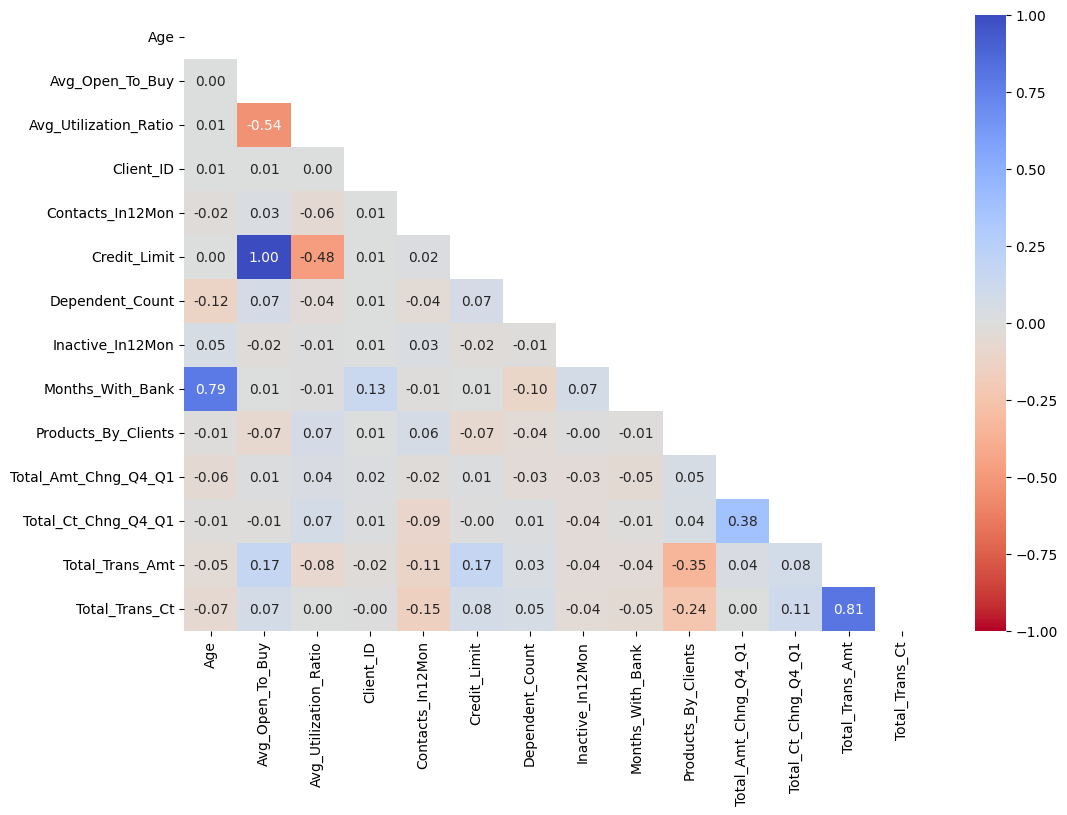

In [ ]:
# Use function to plot correlation heatmap
corrPlot(churn_df_num)

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]]

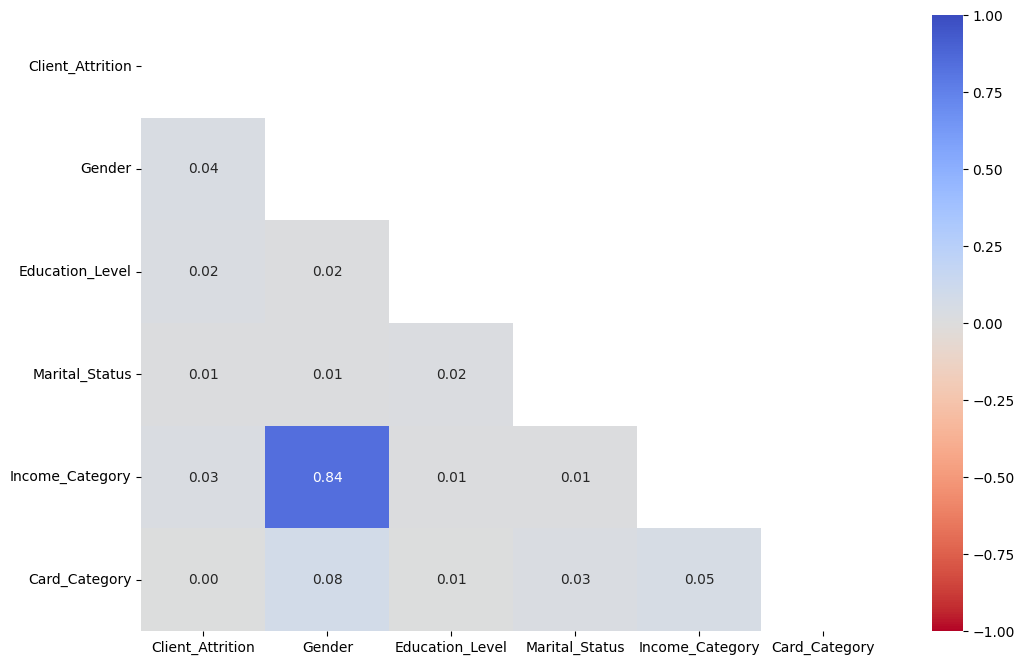

In [ ]:
corrPlot(churn_df_cat)

### $\color{blue}{\text{Removing Colinear Variables}}$
- If correlation between variables are greater than 0.7 (70%), one of the variables should be removed.

In [ ]:
'''
This function drops highly correlated variables given a threshold.
It drops the variable with smaller variance
'''

def drop_highly_correlated(data, threshold):
    cor_matrix = data.corr().abs()
    sol = (cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))).unstack().dropna()

    to_drop=[]
    for i in range(len(sol[sol > threshold].index.tolist())):
        var1 = sol[sol >= threshold].index.tolist()[i][0]
        var2 = sol[sol >= threshold].index.tolist()[i][1]

        if(data[var1].var() < data[var2].var()): to_drop.append(var1)
        else: to_drop.append(var2)

    dropped_vars = list(set(to_drop))
    return dropped_vars, data.drop(dropped_vars, axis=1)

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]]

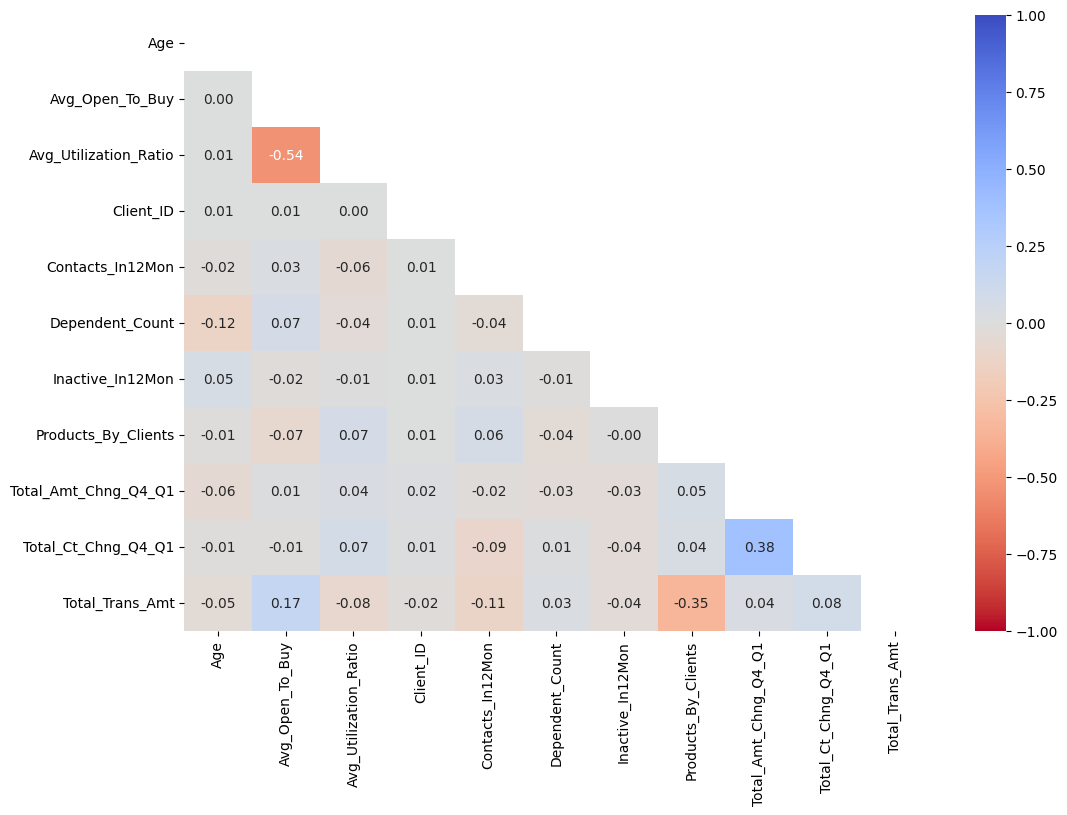

In [ ]:
# Use the function to remove variables with high correlation
dropped_vars_num, new_churn_num = drop_highly_correlated(data=churn_df_num, threshold=0.7)

# Plot the correlation of the resulting data
corrPlot(data = new_churn_num)

### $\color{blue}{\text{Removing Near Zero-Variance Variables}}$
- Some variables have little or no variation. They do not add much value to the model

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vThreshold = VarianceThreshold(threshold = 0.1)
vThreshold.fit_transform(new_churn_num)

# Get variables with greater variance
vars = new_churn_num.columns[vThreshold.get_support()]

# Subset data for variables with greater variance
churn_varDf_num = new_churn_num[vars]

### $\color{blue}{\text{Standardization (numeric)}}$

- To reduce the effect of outliers

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize data // comparing variables 'apples to apples'
churn_std = StandardScaler().fit_transform(churn_varDf_num)
# Transforms housing_std into a data frame and getting column names instead of numbers
churn_stdDf = pd.DataFrame(churn_std, columns = churn_varDf_num.columns)

# Bring the dependent variable to the standardized data // do NOT standardize dependent variable
churn_std_dep = pd.concat([churn_stdDf, churn_df['Avg_Utilization_Ratio']], axis = 1)

### $\color{blue}{\text{Data Partitioning}}$

1. Identify dependent and independent variables
2. Partition the data such that 70% is used for training and 30% is used for testing

In [ ]:
from sklearn.model_selection import train_test_split
churn_std_full= pd.concat([churn_std_dep,churn_df_cat], axis=1)

# Independent variables used for regression
depVar = churn_std_full['Avg_Utilization_Ratio']

# Exclude 'Avg_Utilization_Ratio' column
indVar = churn_std_full.drop('Avg_Utilization_Ratio', axis=1)

# Partition data into training(70%) and testing(30%).
trainX, testX, trainY, testY = train_test_split(indVar, depVar, test_size = 0.3, random_state = 1)

### $\color{blue}{\text{Dummy Variables}}$


In [ ]:
#!pip install feature_engine
from feature_engine.encoding  import MeanEncoder

mean_enc = MeanEncoder().fit(trainX, trainY)

# Obtain new training and testing data with categorical variables replaced by
# the mean of the dependent variable
new_train = mean_enc.transform(trainX)
new_test = mean_enc.transform(testX)

## $\color{red}{\text{Linear Regression}}$

### $\color{blue}{\text{Multiple Linear Regression Model Training and Output}}$

In [ ]:
import statsmodels.api as sm

#add the intercept term to the data
trainX = sm.add_constant(new_train)

#Model with training data
mlr_model = sm.OLS(trainY, new_train).fit()

#print the model summary
print(mlr_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Avg_Utilization_Ratio   R-squared (uncentered):                   0.669
Model:                               OLS   Adj. R-squared (uncentered):              0.669
Method:                    Least Squares   F-statistic:                              1023.
Date:                   Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                           00:08:21   Log-Likelihood:                          512.87
No. Observations:                   7088   AIC:                                     -997.7
Df Residuals:                       7074   BIC:                                     -901.6
Df Model:                             14                                                  
Covariance Type:               nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--

### $\color{blue}{\text{Residual Analysis and QQ Plot for MLR}}$

- Residual Analysis and QQ-Plot

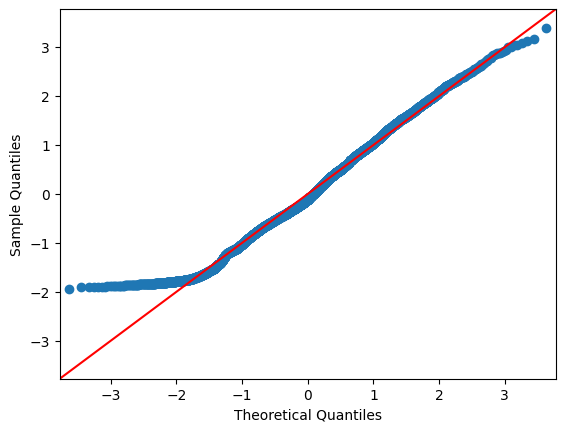

In [ ]:
import scipy.stats as stats

# Residual for mlr
res_mlr = mlr_model.resid
fig = sm.qqplot(res_mlr, stats.t, fit = True, line = '45')
plt.show()

### $\color{blue}{\text{Model Prediction}}$
- Predict the **Avg_Utilization_Ratio** of the testing data as a function of the independent variables

In [ ]:
# Add constant to the testing data
testX = sm.add_constant(new_test)

# Predict for multiple linear regression
mlr_pred = mlr_model.predict(new_test)

## $\color{red}{\text{Quantile Regression}}$

### $\color{blue}{\text{Quantile Regression Model and Output}}$

In [ ]:
churn_std_full.head()

Age  Avg_Open_To_Buy  Client_ID  Contacts_In12Mon  Dependent_Count  \
0  0.583058         2.726343   1.928613          0.492404         1.273283   
1 -0.539638        -0.240757  -0.823446         -0.411616         2.043199   
2  0.333570         1.075522  -0.714438         -2.219655        -0.266547   
3  1.206778         0.913036  -0.672145          0.492404        -0.266547   
4 -0.290150         1.582562  -0.788438         -0.411616         1.273283   

   Inactive_In12Mon  Products_By_Clients  Total_Trans_Amt  \
0         -1.327136             1.407306        -0.904952   
1          0.651940             0.763943        -0.942927   
2         -0.337598             0.120579        -0.880224   
3          0.651940            -1.809512        -1.119261   
4          1.641478            -1.166148        -0.920848   

   Avg_Utilization_Ratio Client_Attrition Gender Education_Level  \
0                  0.066               NO      M        Graduate   
1                  0.217               NO      M      Uneducated   
2                  0.127               NO      M        Graduate   
3                  0.000              YES      M        Graduate   
4                  0.088               NO      M   Post-Graduate   

  Marital_Status Income_Category Card_Category  
0        Married          $120K+          Gold  
1        Married          $120K+          Blue  
2        Married          $120K+          Blue  
3        Married          $120K+          Blue  
4         Single          $120K+          Blue

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# # Assuming trainY is a Series
trainY_df = pd.DataFrame(trainY, columns=['Avg_Utilization_Ratio'])

#add dependent variable back in to train x for quantile regression
# Define the formula correctly
trainXqr = pd.concat([new_train,trainY_df], axis=1)

reg_formula = 'Avg_Utilization_Ratio ~ ' + '+'.join(new_train.columns)

# Build the quantile regression model
quant_reg = smf.quantreg(reg_formula, trainXqr).fit(q=0.5)

# Print results
print(quant_reg.summary())

                           QuantReg Regression Results                           
Dep. Variable:     Avg_Utilization_Ratio   Pseudo R-squared:               0.2128
Model:                          QuantReg   Bandwidth:                     0.05695
Method:                    Least Squares   Sparsity:                       0.5232
Date:                   Tue, 23 Apr 2024   No. Observations:                 7088
Time:                           00:08:49   Df Residuals:                     7073
                                           Df Model:                           14
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2303      0.137     -1.683      0.092      -0.499       0.038
Age                     0.0028      0.003      0.875      0.381      -0.003       0.009
Avg_Open_To_Buy        -0.1343      0.004    -29.863      0.000      -0.14

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [ ]:
new_train.columns

Index(['Age', 'Avg_Open_To_Buy', 'Client_ID', 'Contacts_In12Mon',
       'Dependent_Count', 'Inactive_In12Mon', 'Products_By_Clients',
       'Total_Trans_Amt', 'Client_Attrition', 'Gender', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category'],
      dtype='object')

### $\color{blue}{\text{Model Prediction}}$

- Predict the **Avg_Utilization_Ratio** of the testing data as a function of the independent variables

In [ ]:
# Get predicted house prices for the quantile regression
qr_pred_test = quant_reg.predict(new_test)

## $\color{red}{\text{Lasso Regression}}$


### $\color{blue}{\text{Model Fitting and Result}}$

In [ ]:
# Add the intercept term to the data before modeling
trainX = sm.add_constant(new_train)

# LASSO modeling (As alpha increases, the coefficients shrink to zero. L1_wt = 1 means lasso regression)
# Alpha must yield a smaller error.
lasso_model = sm.OLS(trainY, new_train).fit_regularized(alpha = 0.001, L1_wt = 1)

# Print model coefficients
lasso_model.params

Age                    0.004102
Avg_Open_To_Buy       -0.144385
Client_ID             -0.000449
Contacts_In12Mon      -0.004747
Dependent_Count        0.000000
Inactive_In12Mon       0.001937
Products_By_Clients    0.000000
Total_Trans_Amt       -0.004655
Client_Attrition       0.875030
Gender                 0.110387
Education_Level        0.000000
Marital_Status         0.000000
Income_Category        0.000000
Card_Category          0.000000
dtype: float64

When messing around with alpha, we noticed that the higher we went alpha, all of the coefficients shrunk to zero.

### $\color{blue}{\text{Model Prediction}}$

- Predict the **Avg_Utilization_Ratio** of the testing data as a function of the independent variables

In [ ]:
# Always performed on testing data.
# Add the intercept term to the data before modeling
testX = sm.add_constant(new_test)

# Predict housing prices based on testing data.
lasso_pred_test = lasso_model.predict(new_test)

### $\color{blue}{\text{QQ Plot}}$

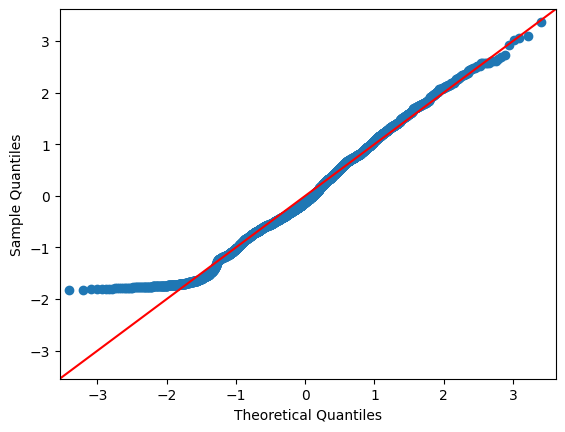

In [ ]:
import scipy.stats as stats

residual = testY - lasso_pred_test
fig = sm.qqplot(residual, stats.t, fit = True, line = '45')
plt.show()

## $\color{red}{\text{Decision Tree and Random Forest Regression}}$

### $\color{blue}{\text{Model Fitting and Result}}$


In [ ]:
# !pip install dmba
from dmba import plotDecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a decision tree and random forest model
dt_model = DecisionTreeRegressor(random_state = 1).fit(new_train, trainY)
rf_model = RandomForestRegressor(random_state = 1).fit(new_train, trainY)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.124451 to fit


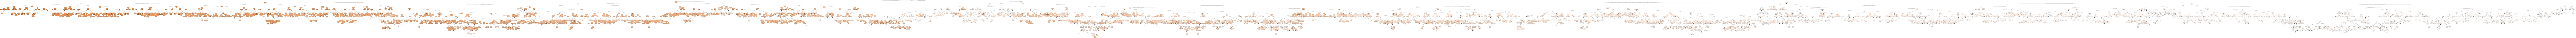

In [ ]:
# Plot the decision tree model
column_names = new_train.columns
plotDecisionTree(dt_model, feature_names = column_names)

### $\color{blue}{\text{Model Predictions}}$

- Using the **testing data**, predict the **Avg_Utilization_Ratio**
  - This is prediction on unseen data

In [ ]:
# Get Avg_Utilization_Ratio predictions
dt_pred = dt_model.predict(new_test)
rf_pred = rf_model.predict(new_test)

### $\color{blue}{\text{QQ Plot}}$

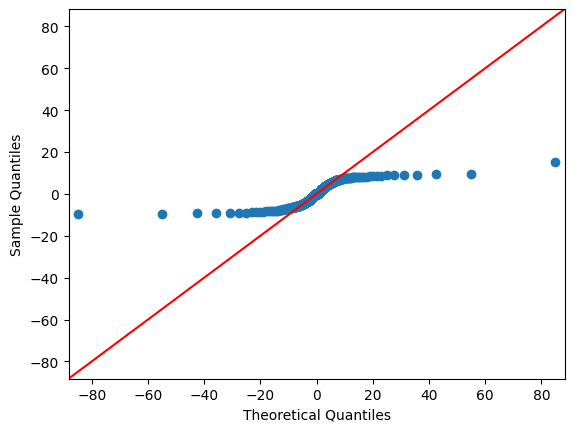

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Get residuals for decision tree and rf models
dt_res = testY - dt_pred
rf_res = testY - rf_pred

# Decision Tree Plot
fig = sm.qqplot(dt_res, stats.t, fit = True, line = '45')
plt.show()

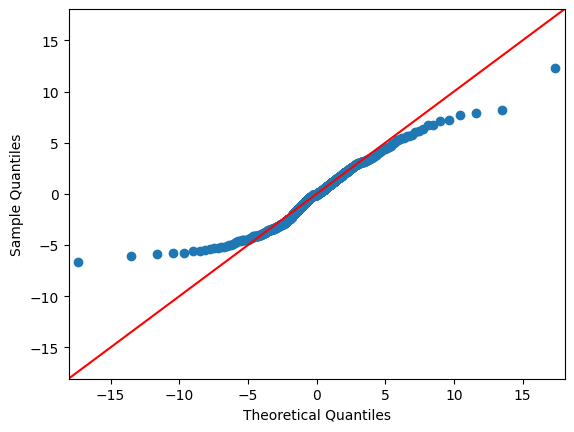

In [ ]:
# Random Forest Plots
fig = sm.qqplot(rf_res, stats.t, fit = True, line = '45')
plt.show()

## $\color{red}{\text{KNN *Regression*}}$

### $\color{blue}{\text{Model Fitting and Result}}$

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Creating the model
knn_model = KNeighborsRegressor(n_neighbors = 2, n_jobs = -1).fit(new_train, trainY)

### $\color{blue}{\text{Model Predictions}}$

- Using the **testing data**, predict the **Avg_Utilization_Ratio**
  - This is prediction on unseen data

In [ ]:
# Get Avg_Utilization_Ratio predictions
knn_pred = knn_model.predict(new_test)

### $\color{blue}{\text{QQ Plot}}$

In [ ]:
# Getting residuals
knn_res = testY - knn_pred

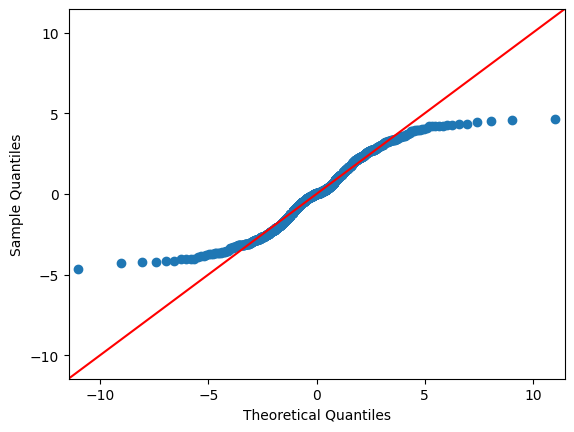

In [ ]:
# QQ-plot
fig = sm.qqplot(knn_res, stats.t, fit = True, line = '45')

## $\color{red}{\text{RMSE}}$
### $\color{blue}{\text{Quantile Regression}}$

In [ ]:
testY_df = pd.DataFrame(testY, columns=['Avg_Utilization_Ratio'])

In [ ]:
# !pip install dmba
from dmba import regressionSummary

# Compute the regression diagnostics
print("***************Testing Data***************")
regressionSummary(testY_df['Avg_Utilization_Ratio'], qr_pred_test)

***************Testing Data***************

Regression statistics

               Mean Error (ME) : 0.0266
Root Mean Squared Error (RMSE) : 0.2309
     Mean Absolute Error (MAE) : 0.1818


### $\color{blue}{\text{MLR}}$

In [ ]:
# Compute the regression diagnostics
print("***************MLR REGRESSION SUMMARY***************")
regressionSummary(testY_df['Avg_Utilization_Ratio'], mlr_pred)

***************MLR SUMMARY***************

Regression statistics

               Mean Error (ME) : -0.0009
Root Mean Squared Error (RMSE) : 0.2258
     Mean Absolute Error (MAE) : 0.1842


### $\color{blue}{\text{Quantile Regression}}$

In [ ]:
# Compute the regression diagnostics
print("***************QUANTILE REGRESSION SUMMARY***************")
regressionSummary(testY_df['Avg_Utilization_Ratio'], qr_pred_test)

***************QUANTILE REGRESSION SUMMARY***************

Regression statistics

               Mean Error (ME) : 0.0266
Root Mean Squared Error (RMSE) : 0.2309
     Mean Absolute Error (MAE) : 0.1818


### $\color{blue}{\text{LASSO Regression}}$

In [ ]:
# get model diagnostic measures
print('****************LASSO SUMMARY***************')
regressionSummary(testY_df, lasso_pred_test)

****************LASSO SUMMARY***************

Regression statistics

               Mean Error (ME) : 0.0005
Root Mean Squared Error (RMSE) : 0.2268
     Mean Absolute Error (MAE) : 0.1858


### $\color{blue}{\text{Decision Tree Regression}}$

In [ ]:
# Compute common regression diagnostics
print("******************** DECISION TREE REGRESSION SUMMARY********************")
regressionSummary(testY_df, dt_pred)

******************** DECISION TREE REGRESSION SUMMARY********************

Regression statistics

               Mean Error (ME) : 0.0028
Root Mean Squared Error (RMSE) : 0.1502
     Mean Absolute Error (MAE) : 0.0956


### $\color{blue}{\text{Random Forest Regression}}$

In [ ]:
# Compute common regression diagnostics
print("******************** RANDOM FOREST REGRESSION SUMMARY ********************")
regressionSummary(testY_df, rf_pred)

******************** RANDOM FOREST REGRESSION SUMMARY ********************

Regression statistics

               Mean Error (ME) : 0.0030
Root Mean Squared Error (RMSE) : 0.1110
     Mean Absolute Error (MAE) : 0.0767


### $\color{blue}{\text{KNN Regression}}$

In [ ]:
# Compute common regression diagnostics
print("******************** KNN REGRESSION SUMMARY ********************")
regressionSummary(testY_df, knn_pred)

******************** KNN REGRESSION SUMMARY ********************

Regression statistics

               Mean Error (ME) : -0.0078
Root Mean Squared Error (RMSE) : 0.2685
     Mean Absolute Error (MAE) : 0.1923


## $\color{red}{\text{Classification Modeling}}$

### $\color{blue}{\text{Data Partitioning}}$

In [ ]:
# concatenating our categorical and numeric components after imputation
full_churn= pd.concat([churn_df_num,churn_df_cat], axis=1)

#defining independent and dependent variables

# Dependent variable to be used in the model
class_dep_var = full_churn['Client_Attrition']
# Independent variables to be used in the model
class_ind_var = full_churn.drop('Client_Attrition', axis=1)

# Partition data into training (70%) and testing (30%)
class_train_x, class_test_x, class_train_y, class_test_y = train_test_split(class_ind_var, class_dep_var, test_size=0.3, random_state=1)

### $\color{blue}{\text{Dummy Variables}}$

-We must convert the strings for attrition to 1 for yes, and 0 for no to get the mean to use for the dummy variables

In [ ]:
from feature_engine.encoding import MeanEncoder

# Map 'YES' to 1 and 'NO' to 0 in class_train_y
class_train_y_mapped = class_train_y.map({'YES': 1, 'NO': 0})
class_test_y_mapped = class_test_y.map({'YES': 1, 'NO': 0})

# Mean encoding
class_mean_enc = MeanEncoder().fit(class_train_x, class_train_y_mapped)

# Obtain new train and testing data with the categorical variables replaced with the mean of the dependent variable
class_new_train = class_mean_enc.transform(class_train_x)
class_new_test = class_mean_enc.transform(class_test_x)



In [ ]:
# Check unique values in the column
unique_values = class_train_y_df['Client_Attrition'].unique()
print(unique_values)

# If there are unexpected values, decide how to handle them
# For example, you can replace them with NaN or assign them to a specific value
unexpected_values = set(unique_values) - {'1', '0'}
# if unexpected_values:
#     print("Unexpected values found:", unexpected_values)
#     # Replace unexpected values with NaN
#     class_train_y_df['Client_Attrition'] = class_train_y_df['Client_Attrition'].replace(unexpected_values, np.nan)

# # Now, map 'YES' to 0 and 'NO' to 1
# attrition_mapping = {'YES': 0, 'NO': 1}
# class_train_y_df['Client_Attrition'] = class_train_y_df['Client_Attrition'].map(attrition_mapping)


[1 0]


In [ ]:
class_new_train.head()

Age  Avg_Open_To_Buy  Avg_Utilization_Ratio  Client_ID  \
8284   32           1732.0                  0.000  721406658   
9863   47           1491.0                  0.000  779839758   
5350   53          34516.0                  0.000  710980383   
9641   52           7884.0                  0.132  710520408   
5914   57           3451.0                  0.000  720231108   

      Contacts_In12Mon  Credit_Limit  Dependent_Count  Inactive_In12Mon  \
8284                 3        1732.0                0                 3   
9863                 3        1491.0                2                 2   
5350                 3       34516.0                3                 2   
9641                 3        9078.0                4                 3   
5914                 3        3451.0                2                 4   

      Months_With_Bank  Products_By_Clients  Total_Amt_Chng_Q4_Q1  \
8284                36                    6                 0.683   
9863                31                    3                 0.716   
5350                33                    2                 0.534   
9641                36                    5                 0.745   
5914                39                    3                 0.744   

      Total_Ct_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct    Gender  \
8284                0.536             2479              43  0.171527   
9863                0.804             4634              92  0.171527   
5350                1.114             6361              74  0.148975   
9641                0.812             4458              87  0.171527   
5914                0.676             3031              57  0.148975   

      Education_Level  Marital_Status  Income_Category  Card_Category  
8284         0.161350        0.153846         0.168244       0.161720  
9863         0.179487        0.169197         0.168244       0.161720  
5350         0.145092        0.169197         0.159027       0.148241  
9641         0.145092        0.169197         0.168244       0.161720  
5914         0.161350        0.169197         0.168244       0.161720

In [ ]:
class_new_test

Age  Avg_Open_To_Buy  Avg_Utilization_Ratio  Client_ID  \
6498   44           3480.0                  0.219  822898758   
9013   44           5409.0                  0.000  716506083   
2053   44            903.0                  0.598  716466483   
3211   47           6288.0                  0.145  772879158   
5559   55           1485.0                  0.395  779462433   
...   ...              ...                    ...        ...   
9826   44           2747.0                  0.477  716237508   
9200   65           4803.0                  0.257  715612983   
5221   50          34516.0                  0.000  779548008   
1224   31          10318.0                  0.144  716089983   
6122   40           2295.0                  0.000  711990933   

      Contacts_In12Mon  Credit_Limit  Dependent_Count  Inactive_In12Mon  \
6498                 4        4453.0                5                 3   
9013                 4        5409.0                1                 3   
2053                 3        2245.0                3                 3   
3211                 2        7357.0                5                 1   
5559                 1        2453.0                2                 3   
...                ...           ...              ...               ...   
9826                 2        5254.0                5                 3   
9200                 4        6463.0                1                 2   
5221                 3       34516.0                2                 2   
1224                 4       12050.0                0                 1   
6122                 2        2295.0                2                 3   

      Months_With_Bank  Products_By_Clients  Total_Amt_Chng_Q4_Q1  \
6498                40                    3                 0.908   
9013                36                    5                 0.819   
2053                34                    3                 0.687   
3211                38                    4                 0.770   
5559                37                    3                 1.081   
...                ...                  ...                   ...   
9826                36                    4                 0.751   
9200                55                    5                 0.995   
5221                35                    1                 0.742   
1224                24                    3                 0.804   
6122                29                    4                 0.699   

      Total_Ct_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct    Gender  \
6498                0.650             3239              66  0.171527   
9013                0.818            10291              60  0.171527   
2053                0.706             4624              87  0.171527   
3211                0.641             3943              64  0.148975   
5559                0.613             2218              50  0.171527   
...                   ...              ...             ...       ...   
9826                0.641             4501              64  0.171527   
9200                1.722             2336              49  0.171527   
5221                0.729             7745              83  0.148975   
1224                0.704             2015              46  0.148975   
6122                0.824             3292              62  0.171527   

      Education_Level  Marital_Status  Income_Category  Card_Category  
6498         0.179487        0.155971         0.168244       0.161720  
9013         0.145092        0.155971         0.168244       0.161720  
2053         0.158654        0.169197         0.155978       0.161720  
3211         0.145092        0.155971         0.139653       0.161720  
5559         0.161350        0.155971         0.168244       0.161720  
...               ...             ...              ...            ...  
9826         0.145092        0.155971         0.168244       0.161720  
9200         0.161350        0.169197         0.168244       0.161

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize data (zero mean and unit variance)
scaler = StandardScaler().fit(class_new_train)

# Obtain standardized data for training and testing data
class_std_train = pd.DataFrame(scaler.transform(class_new_train), columns=class_new_train.columns)
class_std_test = pd.DataFrame(scaler.transform(class_new_test), columns=class_new_test.columns)

### $\color{blue}{\text{ANN: MultiLayer Percepton (MLP)}}$

1. Fit an MLP model on the training data

In [ ]:
# Scikit learn
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = 3, random_state = 50, activation = 'logistic',
                    solver = "lbfgs", max_iter= 10000).fit(class_std_train, class_train_y_mapped)

### $\color{blue}{\text{SVM}}$

1. Fit an SVM model on the training data

In [ ]:
from sklearn.svm import SVC

# Fit SVM model
svm = SVC(random_state=50).fit(class_std_train, class_train_y_mapped)

### $\color{blue}{\text{kNN Modeling}}$

1. Fit the kNN model on the training data - The choice of "k" is crucial

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# fit kNN model with standardized data
knn = KNeighborsClassifier(n_neighbors=3).fit(class_std_train, class_train_y_mapped)

### $\color{blue}{\text{Logistic Regression}}$

1. Fit a logistic regression model on the **training data**
2. Print the **intercept** and model **coefficients**


In [ ]:
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model
logit = LogisticRegression(random_state=0).fit(class_std_train, class_train_y_mapped)

### $\color{blue}{\text{Random Forests}}$

1. Fit a random forest model to the training data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fit a random forest model
rf = RandomForestClassifier(random_state=0, max_depth=3).fit(class_std_train, class_train_y_mapped)

### $\color{blue}{\text{Variable Importance}}$
1. Obtain a plot of the important variables for random forest and decision tree models

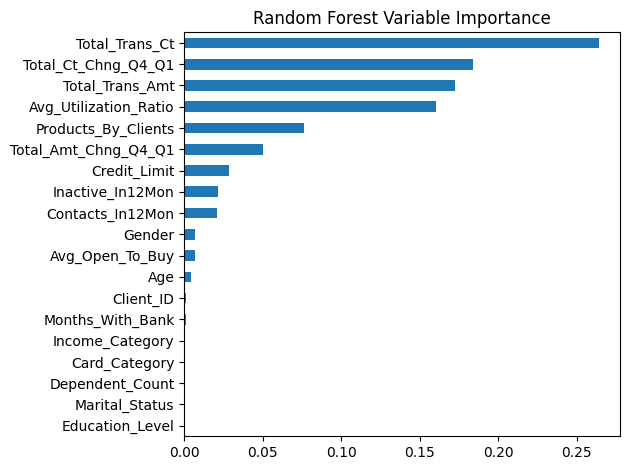

In [ ]:
import seaborn as sns

# Get important variables for random forest and decision trees
rf_importances = rf.feature_importances_

# Important features
imp_rf_features = pd.DataFrame({'feature': class_std_train.columns, 'rf_importance': rf_importances})

# Sort variables according to their importance scores
imp_rf_features_sort = imp_rf_features.sort_values(by="rf_importance", ascending=True)

# Plotting random forest variable importance
imp_rf_features_sort.plot(kind='barh', x='feature', legend=False)
plt.title("Random Forest Variable Importance")
plt.ylabel("")
plt.tight_layout()
plt.show()

## $\color{red}{\text{Model Diagnostics on Testing Data}}$

### $\color{blue}{\text{Model Predictions}}$

1. Using the **testing data**, predict whether an individual will be approved for a **Personal_Loan**
  - This is prediction on unseen data

In [ ]:
# Get classes predicted by MLP on testing data
mlp_class = mlp.predict(class_std_test)

# Get classes predicted by SVM on testing data
svm_class = svm.predict(class_std_test)

# Get classes predicted by random forest on testing data
knn_class = knn.predict(class_std_test)

# Get classes predicted by random forest on testing data
rf_class = rf.predict(class_std_test)

# Get classes predicted by logistic regression on testing data
logit_class = logit.predict(class_std_test)

### $\color{blue}{\text{Accuracy and Misclassification Rate}}$
1. Provide the model's accuracy rate - what does it tell you?
2. Provide the model's misclassification rate - what does it tell you?

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy rate for LDA and logistic regression
mlp_accuracy = accuracy_score(class_test_y_mapped, mlp_class)
svm_accuracy = accuracy_score(class_test_y_mapped, svm_class)
rf_accuracy = accuracy_score(class_test_y_mapped, rf_class)
logit_accuracy = accuracy_score(class_test_y_mapped, logit_class)
knn_accuracy = accuracy_score(class_test_y_mapped, knn_class)

# Get misclassification rate
mlp_misclass = round(1 - mlp_accuracy, 4)
svm_misclass = round(1 - svm_accuracy, 4)
rf_misclass = round(1 - rf_accuracy, 4)
logit_misclass = round(1 - logit_accuracy, 4)
knn_misclass = round(1 - knn_accuracy, 4)

print("*********************** ACCURACY RATES ***********************")
print("Accuracy rate for MLP:", mlp_accuracy)
print("Accuracy rate for SVM:", svm_accuracy)
print("Accuracy rate for RF:", rf_accuracy)
print("Accuracy rate for kNN:", knn_accuracy)
print("Accuracy rate for logistic regression:", logit_accuracy)

print("\n*********************** MISCLASSIFICATION RATES ***********************")
print("Misclassification rate for MLP:", mlp_misclass)
print("Misclassification rate for SVM:", svm_misclass)
print("Misclassification rate for RF:", rf_misclass)
print("Misclassification rate for kNN:", knn_misclass)
print("Misclassification rate for logistic regression:", logit_misclass)

*********************** ACCURACY RATES ***********************
Accuracy rate for MLP: 0.9401118789075353
Accuracy rate for SVM: 0.9256334320500165
Accuracy rate for RF: 0.8868048700230339
Accuracy rate for kNN: 0.8874629812438302
Accuracy rate for logistic regression: 0.8940440934517934

*********************** MISCLASSIFICATION RATES ***********************
Misclassification rate for MLP: 0.0599
Misclassification rate for SVM: 0.0744
Misclassification rate for RF: 0.1132
Misclassification rate for kNN: 0.1125
Misclassification rate for logistic regression: 0.106


### $\color{blue}{\text{ROC Curve}}$
1. Provide the ROC curve and comment on it

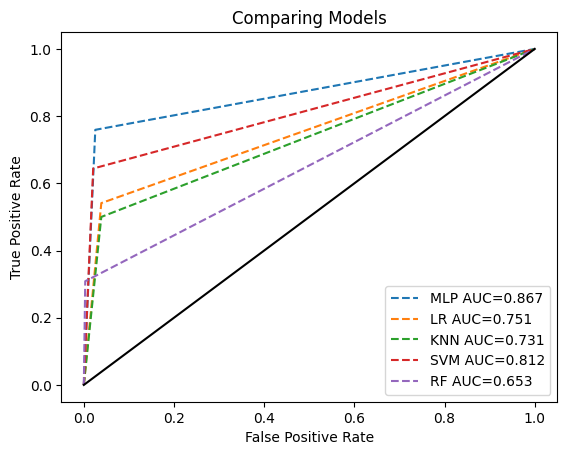

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for test data
mlp_auc = roc_auc_score(class_test_y_mapped, mlp_class)
logit_auc = roc_auc_score(class_test_y_mapped, logit_class)
knn_auc = roc_auc_score(class_test_y_mapped, knn_class)
svm_auc = roc_auc_score(class_test_y_mapped, svm_class)
rf_auc = roc_auc_score(class_test_y_mapped, rf_class)

# calculate fpr and tpr for all models
mlp_fpr, mlp_tpr, _ = roc_curve(class_test_y_mapped, mlp_class)
logit_fpr, logit_tpr, _ = roc_curve(class_test_y_mapped, logit_class)
knn_fpr, knn_tpr, _ = roc_curve(class_test_y_mapped, knn_class)
svm_fpr, svm_tpr, _ = roc_curve(class_test_y_mapped, svm_class)
rf_fpr, rf_tpr, _ = roc_curve(class_test_y_mapped, rf_class)

# Plotting
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label="{}{:.3f}".format("MLP AUC=", mlp_auc))
plt.plot(logit_fpr, logit_tpr, linestyle='--', label="{}{:.3f}".format("LR AUC=", logit_auc))
plt.plot(knn_fpr, knn_tpr, linestyle='--', label="{}{:.3f}".format("KNN AUC=", knn_auc))
plt.plot(svm_fpr, svm_tpr, linestyle='--', label="{}{:.3f}".format("SVM AUC=", svm_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label="{}{:.3f}".format("RF AUC=", rf_auc))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("Comparing Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

### $\color{blue}{\text{Learning Curves}}$
1. Provides an indication of overfitting or underfitting
  - Key idea: Can the model "hold its own" on new data

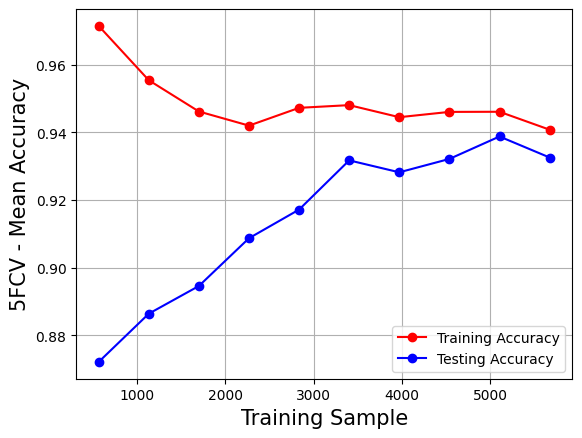

In [ ]:
# MLP Model
from sklearn.model_selection import learning_curve

size, train_scores, test_scores = learning_curve(estimator=mlp, X=class_std_train, y=class_train_y_mapped,
                                                 train_sizes=np.linspace(0.1, 1, 10),
                                                 cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(size, train_mean, color='r', marker='o', label='Training Accuracy')
plt.plot(size, test_mean, color='b', marker='o', label='Testing Accuracy')
plt.xlabel('Training Sample', fontsize=15)
plt.ylabel('5FCV - Mean Accuracy', fontsize=15)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

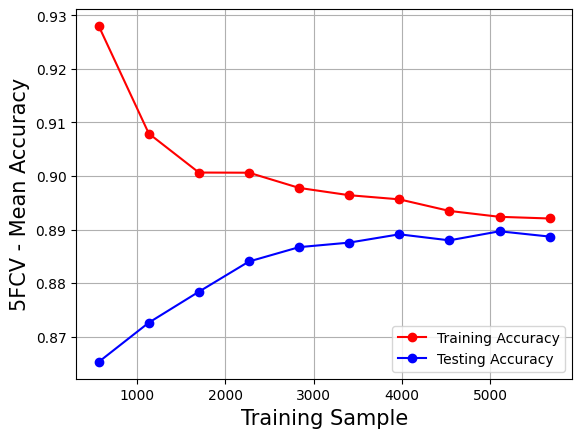

In [ ]:
# RF model
from sklearn.model_selection import learning_curve

size, train_scores, test_scores = learning_curve(estimator=rf, X=class_std_train, y=class_train_y_mapped,
                                                 train_sizes=np.linspace(0.1, 1, 10),
                                                 cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(size, train_mean, color='r', marker='o', label='Training Accuracy')
plt.plot(size, test_mean, color='b', marker='o', label='Testing Accuracy')
plt.xlabel('Training Sample', fontsize=15)
plt.ylabel('5FCV - Mean Accuracy', fontsize=15)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()